<a href="https://colab.research.google.com/github/tulasikodi/Medical-Inventory-Optimization/blob/main/MEDICAL_INVENTORY_OPTIMIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading packages

In [ ]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading dataset

In [ ]:
df= pd.read_excel("/content/Medical Inventory Optimaization Dataset.xlsx")

data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12550 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


In [ ]:
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-01-06 00:00:00,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


In [ ]:
#display column names
df_columns =df.columns
print(df_columns)

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')


In [ ]:
#display shape of the data
df.shape

(14218, 14)

In [ ]:
df.describe()

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
count,1.421800e+04,14218.000000,14218.000000,14218.000000,14218.000000,14218.000000
mean,1.201809e+10,2.231748,0.291954,124.823957,234.038300,29.126755
std,2.810229e+04,5.132043,1.643322,464.782794,671.261572,182.262335
min,1.201800e+10,0.000000,0.000000,40.000000,0.000000,0.000000
25%,1.201808e+10,1.000000,0.000000,44.928000,47.815000,0.000000
50%,1.201809e+10,1.000000,0.000000,53.650000,86.424000,0.000000
75%,1.201811e+10,2.000000,0.000000,77.800000,181.000000,0.000000
max,1.201813e+10,150.000000,50.000000,33178.000000,39490.000000,8014.000000


HANDLING MISSING VALUES

In [ ]:

df.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1668
SubCat1           1692
dtype: int64

In [ ]:
#display data types
df.dtypes

Typeofsales        object
Patient_ID          int64
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

In [ ]:
#mode imputation
categorical_vars = ['Formulation', 'DrugName', 'SubCat', 'SubCat1']
for col in categorical_vars:
    mode_val = df[col].mode()[0]  # Calculate mode
    df[col].fillna(mode_val, inplace=True)

In [ ]:
df.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

handling duplicates

In [ ]:
# Check for duplicates
num_duplicates = df.duplicated().sum()

# Display the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 26


In [ ]:
#display the duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
      Typeofsales   Patient_ID    Specialisation         Dept  \
2706         Sale  12018107758   Specialisation8  Department1   
4444         Sale  12018091924   Specialisation4  Department1   
4509         Sale  12018073408   Specialisation4  Department1   
5539         Sale  12018111400   Specialisation7  Department1   
6254         Sale  12018101171   Specialisation4  Department1   
6499         Sale  12018036747   Specialisation7  Department1   
6731       Return  12018104215   Specialisation1  Department1   
7664         Sale  12018098932   Specialisation8  Department1   
7950         Sale  12017999409  Specialisation31  Department1   
7968         Sale  12018075690   Specialisation4  Department1   
8661         Sale  12018101628   Specialisation7  Department1   
8973         Sale  12018117928   Specialisation5  Department1   
9470       Return  12018104318   Specialisation8  Department1   
9643         Sale  12018103206   Specialisation6  Department1   
10990    

In [ ]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check the shape of the cleaned DataFrame to verify that duplicates were removed
print("Shape of cleaned DataFrame:", df_cleaned.shape)


Shape of cleaned DataFrame: (14192, 14)


SUMMARY STATISTICS

In [ ]:
# Summary statistics for relevant columns
print(df[['Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP']].describe())


           Quantity  ReturnQuantity    Final_Cost   Final_Sales        RtnMRP
count  14218.000000    14218.000000  14218.000000  14218.000000  14218.000000
mean       2.231748        0.291954    124.823957    234.038300     29.126755
std        5.132043        1.643322    464.782794    671.261572    182.262335
min        0.000000        0.000000     40.000000      0.000000      0.000000
25%        1.000000        0.000000     44.928000     47.815000      0.000000
50%        1.000000        0.000000     53.650000     86.424000      0.000000
75%        2.000000        0.000000     77.800000    181.000000      0.000000
max      150.000000       50.000000  33178.000000  39490.000000   8014.000000


In [ ]:
df['BounceRate'] = np.where(df['Quantity'] != 0, (df['ReturnQuantity'] / df['Quantity']) * 100, 0)
# Calculate average bounce rate
average_bounce_rate = df['BounceRate'].mean()
print(average_bounce_rate)

0.0


In [ ]:
# Calculate median and variance for multiple columns
columns_of_interest = ['BounceRate', 'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP']
summary_statistics = df[columns_of_interest].agg(['median', 'var'])
print(summary_statistics)

        BounceRate   Quantity  ReturnQuantity     Final_Cost    Final_Sales  \
median         0.0   1.000000        0.000000      53.650000      86.424000   
var            0.0  26.337862        2.700506  216023.045394  450592.097666   

              RtnMRP  
median      0.000000  
var     33219.558938  


bars


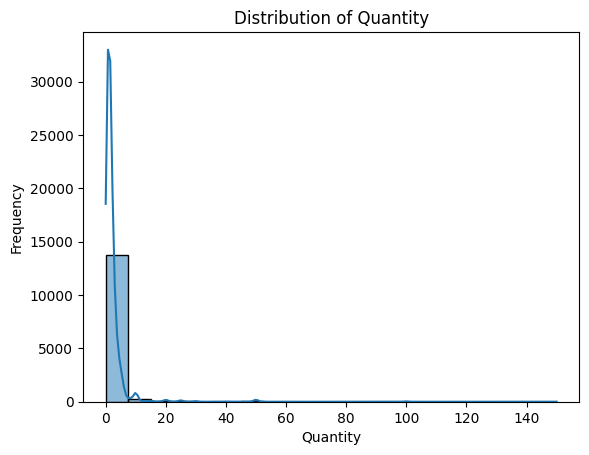

In [ ]:
# Distribution visualization for relevant columns
sns.histplot(data=df, x='Quantity', bins=20, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

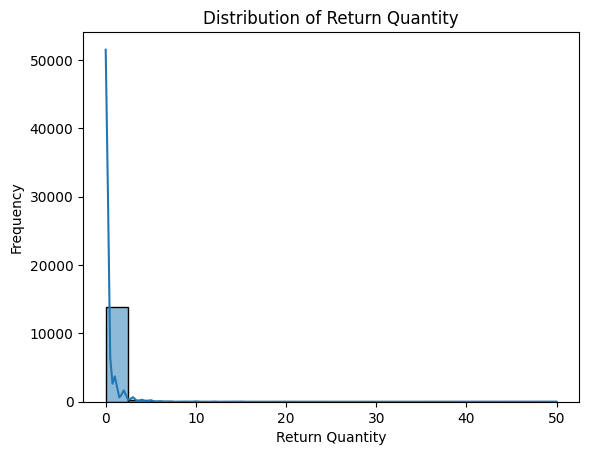

In [ ]:
sns.histplot(data=df, x='ReturnQuantity', bins=20, kde=True)
plt.title('Distribution of Return Quantity')
plt.xlabel('Return Quantity')
plt.ylabel('Frequency')
plt.show()

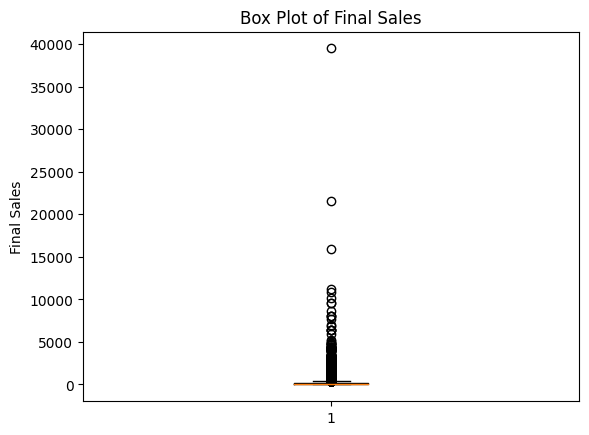

In [ ]:
# Create a box plot of a numerical variable
plt.boxplot(df['Final_Sales'])
plt.title('Box Plot of Final Sales')
plt.ylabel('Final Sales')
plt.show()

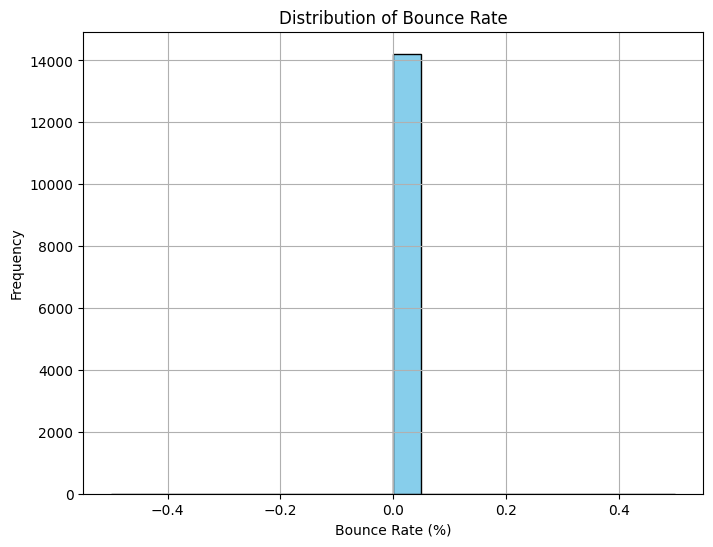

In [ ]:
# Visualize bounce rate distribution
plt.figure(figsize=(8, 6))
plt.hist(df['BounceRate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Bounce Rate')
plt.xlabel('Bounce Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:

# Group by SubCat and count returned drug names
return_counts_by_subcat = df[df['Typeofsales'] == 'Return'].groupby('SubCat')['DrugName'].count().sort_values(ascending=False)
print("Returned Drug Names by Subcategory:")
print(return_counts_by_subcat)


Returned Drug Names by Subcategory:
SubCat
INJECTIONS                      926
IV FLUIDS, ELECTROLYTES, TPN    475
TABLETS & CAPSULES               94
INHALERS & RESPULES              71
POWDER                           31
LIQUIDS & SOLUTIONS              24
OINTMENTS, CREAMS & GELS         15
SYRUP & SUSPENSION               15
PESSARIES & SUPPOSITORIES        11
NUTRITIONAL SUPPLEMENTS           8
DROPS                             7
VACCINE                           2
LOTIONS                           1
PATCH                             1
Name: DrugName, dtype: int64


In [ ]:
# Convert date formate to month
df['Dateofbill'] = pd.to_datetime(df['Dateofbill'])
df['Dateofbill'] = df['Dateofbill'].dt.strftime('%b')
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1,BounceRate
0,Sale,12018098765,Specialisation6,Department1,Jan,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS,0.0
1,Sale,12018103897,Specialisation7,Department1,Jul,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES,0.0
2,Sale,12018101123,Specialisation2,Department3,Jun,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM,0.0
3,Sale,12018079281,Specialisation40,Department1,Mar,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS,0.0
4,Sale,12018117928,Specialisation5,Department1,Dec,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM,0.0


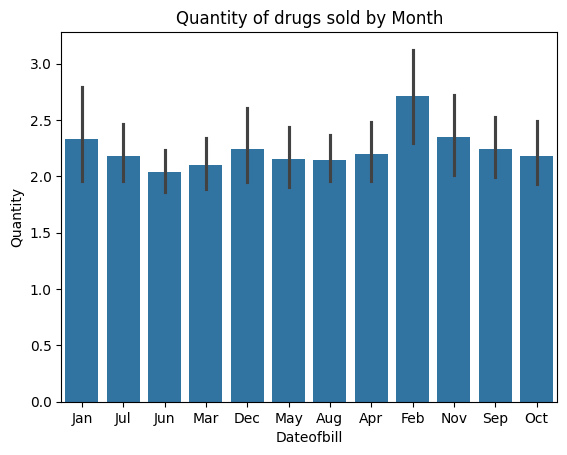

In [ ]:
sns.barplot(data = df, x = 'Dateofbill', y = 'Quantity')
plt.title('Quantity of drugs sold by Month')
plt.show()


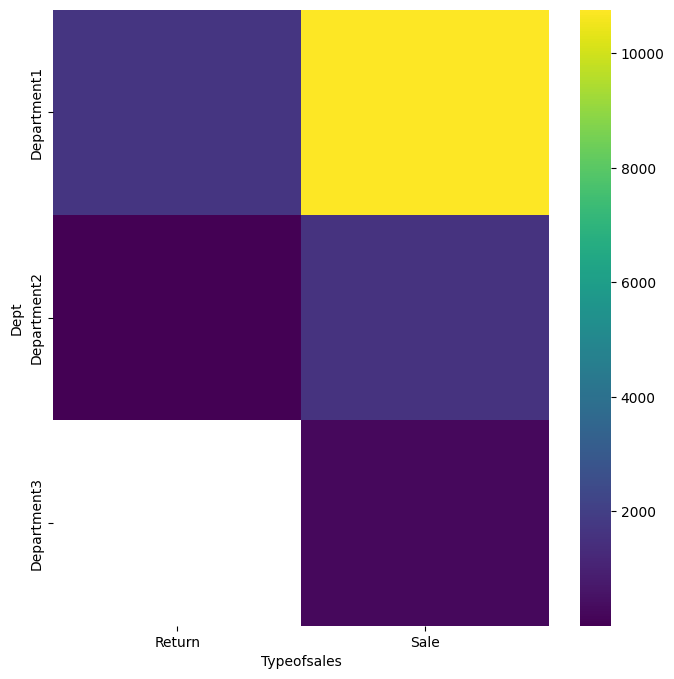

In [ ]:
#  Typeofsales vs Dept

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dept'].value_counts()
    for x_label, grp in df.groupby('Typeofsales')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Typeofsales')
_ = plt.ylabel('Dept')

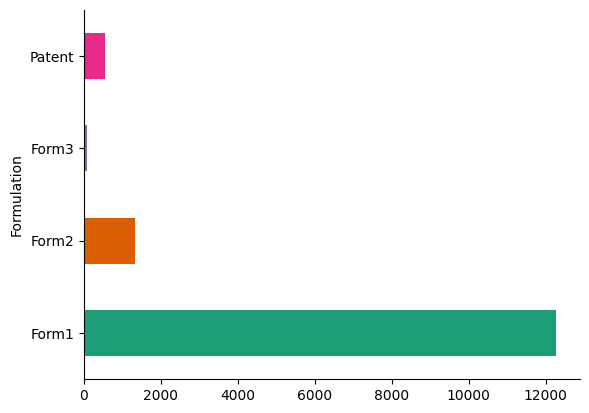

In [ ]:
# Formulation

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Formulation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

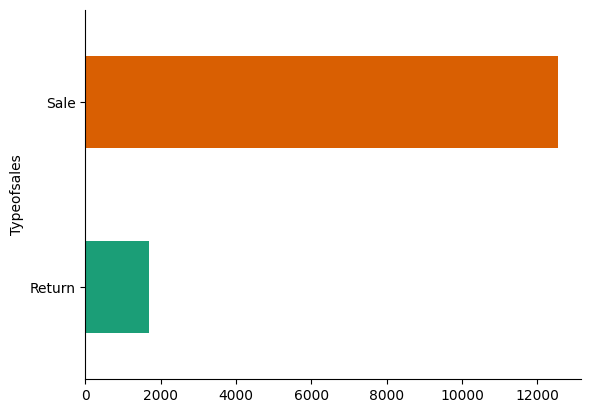

In [ ]:
# Typeofsales

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Typeofsales').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Average Revenue by Season:
Season
High Season    248.009715
Low Season     226.299938
Mid Season     230.772746
Name: Final_Sales, dtype: float64


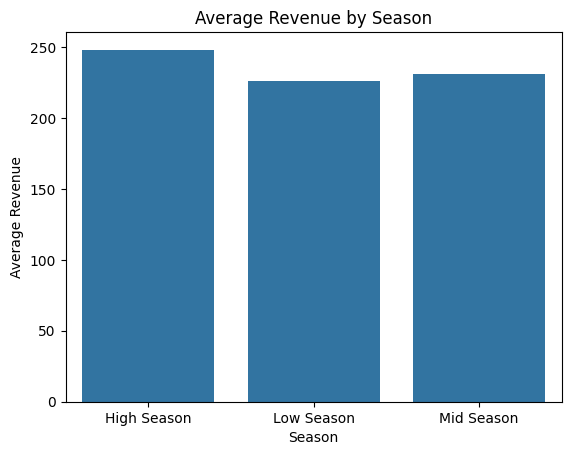

In [ ]:

# Create a new column to represent seasons
df['Season'] = np.select(
    [df['Dateofbill'].isin(['Apr', 'Aug', 'Dec']), df['Dateofbill'].isin(['Jan', 'Jun', 'Sep', 'Nov']), df['Dateofbill'].isin(['Feb', 'Mar', 'May', 'Jul', 'Oct'])],
    ['High Season', 'Low Season', 'Mid Season'], default='Unknown Season')

# Group data by season and calculate average revenue
average_revenue_by_season = df.groupby('Season')['Final_Sales'].mean()

# Print the average revenue for each season
print("Average Revenue by Season:")
print(average_revenue_by_season)

# Create a bar plot to visualize average revenue by season
sns.barplot(x=average_revenue_by_season.index, y=average_revenue_by_season.values)
plt.title('Average Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue')
plt.show()


In [ ]:
# Filter data for Department1 and count return occurrences by Specialisation
return_counts_by_specialisation = df[(df['Typeofsales'] == 'Return') & (df['Dept'] == 'Department1')].groupby('Specialisation')['Patient_ID'].count().sort_values(ascending=False)
print("Return Occurrences by Specialisation in Department1:")
print(return_counts_by_specialisation)


Return Occurrences by Specialisation in Department1:
Specialisation
Specialisation4     507
Specialisation7     277
Specialisation3      93
Specialisation5      76
Specialisation8      72
Specialisation2      65
Specialisation1      59
Specialisation20     52
Specialisation6      50
Specialisation11     50
Specialisation16     49
Specialisation21     44
Specialisation26     32
Specialisation17     26
Specialisation23     26
Specialisation14     25
Specialisation15     21
Specialisation42     15
Specialisation25     15
Specialisation31     15
Specialisation27     12
Specialisation10     11
Specialisation9      11
Specialisation41      9
Specialisation33      8
Specialisation45      6
Specialisation39      6
Specialisation54      6
Specialisation55      5
Specialisation50      5
Specialisation19      5
Specialisation34      5
Specialisation43      3
Specialisation40      3
Specialisation28      3
Specialisation12      2
Specialisation49      2
Specialisation44      1
Specialisation48    

In [ ]:
target_bounce_rate_reduction = 30  # Target percentage reduction in bounce rate
expected_revenue_increase = 2000000  # Expected revenue increase in INR (20 lacs)

# Compare average bounce rate to business goal
average_bounce_rate = df['BounceRate'].mean()
if average_bounce_rate <= (100 - target_bounce_rate_reduction):
    print("The average bounce rate meets the target reduction goal of", target_bounce_rate_reduction, "%.")
else:
    print("The average bounce rate does not meet the target reduction goal of", target_bounce_rate_reduction, "%.")

The average bounce rate meets the target reduction goal of 30 %.
